# **Assignment Part-I**

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

**The company wants to know:**

* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

**Business Goal**

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Solution:

**Steps**
*    Data Load, understanding and exploration
*    Data cleaning
*    Data preparation
*    Model building and evaluation


### Approach:
1.  Importing modules
2.  Data Load, understanding and exploration
3.  Checking and Handling Missing Values
4.  Analyzing Numerical Features
    * 4.1  Checking the Numeric columns
    * 4.2  Detecting and Treatment the outliers for Numeric columns
    * 4.3  Inspecting Correlation
    * 4.4  Univaritate and Bivariate Analysis, Data Visualization
5.  Analyzing Numerical Features
    * 5.1  Checking the Categorical Features
    * 5.2  Data Visualization of Categorical columns
    * 5.3  Creating dummy variable from Categorical columns
6.  Transformation, Scaling and splitting
    * 6.1  Transformation of Target Variable
    * 6.2  Feature Scaling
    * 6.3  Splitting data in Train and Test data
    * 6.4   Train feature Scaling using Standard scaling
7.  Initial Feature Selection with RFE
8.  Ridge Regression
9.  Lasso Regression
10.  Comparing model coefficients
11.  Choosing the final model and most significant features.
12.  Summary

# 1.  Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

## for display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# 2.  Data Load, understanding and exploration

In [2]:
df_input = pd.read_csv("train.csv")
df_input.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [3]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_input.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
print(df_input.shape)
print(df_input.select_dtypes(include=['object']).shape)
print(df_input.select_dtypes(include=['int64', 'float64']).shape)

(1460, 81)
(1460, 43)
(1460, 38)


<div style="background:#eaecef;padding:10px;">
    <h3><i>Summary</i></h3><br/>
    1. Dataset Summary: 1460 rows, 81 columns <br/>
    2. Categorical Columns: 43 columns <br/>
    3. Numeric Columns: 38 columns <br/>
</div>

# 3.  Checking and Handling Missing Values

In [6]:
def checkNullsInDF(df):
    cnts = df.isnull().sum().sort_values(ascending=False)
    percent = (round(df.isnull().sum()/df.isnull().count(), 2)*100).sort_values(ascending=False)
    missing_data = pd.concat([cnts, percent], axis=1, keys=['Counts', 'Percent'])
    print(missing_data[missing_data['Percent']>0])

checkNullsInDF(df_input)

              Counts  Percent
PoolQC          1453    100.0
MiscFeature     1406     96.0
Alley           1369     94.0
Fence           1179     81.0
FireplaceQu      690     47.0
LotFrontage      259     18.0
GarageYrBlt       81      6.0
GarageCond        81      6.0
GarageType        81      6.0
GarageFinish      81      6.0
GarageQual        81      6.0
BsmtFinType2      38      3.0
BsmtExposure      38      3.0
BsmtQual          37      3.0
BsmtCond          37      3.0
BsmtFinType1      37      3.0
MasVnrArea         8      1.0
MasVnrType         8      1.0


<div style="background:#eaecef;padding:10px;">
    <h3><i>Summary</i></h3><br/>
    1. The following columns has NA as value, so replacing NA with None.<br/><br/>
    "Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
    "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", 
    "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"<br/><br/>
    2. Dropping "id" column as it is with unique values and having of no use in analysis.<br/><br/>
    3. Updating the types of the columns as mentioned in the data_description.
        to Object Type = 'MSSubClass', 'OverallQual', 'OverallCond'
        to Numeric Type = 'LotFrontage', 'MasVnrArea'
</div>


In [7]:
na_is_value = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
                    "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", 
                    "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in na_is_value:
    df_input[i].fillna("None", inplace=True)

In [8]:
df_input.drop("Id", axis=1, inplace=True)

In [9]:
# Checking null again
checkNullsInDF(df_input)

             Counts  Percent
LotFrontage     259     18.0
GarageYrBlt      81      6.0
MasVnrArea        8      1.0
MasVnrType        8      1.0


In [10]:
# MasVnrArea and LotFrontage has very few nulls, so filling the values with median
df_input["MasVnrArea"].fillna(df_input["MasVnrArea"].median(), inplace=True)
df_input['LotFrontage'].fillna(df_input['LotFrontage'].median(), inplace=True)
# MasVnrArea is a categorical column, so replacing NULL with None as done with other columns
df_input["MasVnrType"].fillna("None", inplace=True)

# Checking null again
checkNullsInDF(df_input)

             Counts  Percent
GarageYrBlt      81      6.0


In [11]:
## Convert three columns to 'object' type as mentioned above
df_input[['GarageYrBlt','MSSubClass', 'OverallQual', 
          'OverallCond']] = df_input[['GarageYrBlt','MSSubClass', 'OverallQual', 
                                      'OverallCond']].astype('object')

## Convert two columns to 'numeric' type as mentioned above
df_input['LotFrontage'] = pd.to_numeric(df_input['LotFrontage'], errors='coerce')
df_input['MasVnrArea'] = pd.to_numeric(df_input['MasVnrArea'], errors='coerce')


In [12]:
print(df_input.shape)
print(df_input.select_dtypes(include=['object']).shape)
print(df_input.select_dtypes(include=['int64', 'float64']).shape)

(1460, 80)
(1460, 47)
(1460, 33)


# 4.  Analyzing Numerical Features


## 4.1 Checking the Numeric columns


**Checking the Numeric variables and separating in another list  for analysis**

In [13]:
df_num = df_input.select_dtypes(include=['int64', 'float64'])
print(df_num.shape)
print(df_num.columns)
df_num.head(10)

(1460, 33)
Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000
5,85.0,14115,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,2,480,40,30,0,320,0,0,700,10,2009,143000
6,75.0,10084,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2,636,255,57,0,0,0,0,0,8,2007,307000
7,69.0,10382,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,2,484,235,204,228,0,0,0,350,11,2009,200000
8,51.0,6120,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,2,468,90,0,205,0,0,0,0,4,2008,129900
9,50.0,7420,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1,205,0,4,0,0,0,0,0,1,2008,118000


In [14]:
df_num.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,22.027677,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 4.2  Detecting and Treatment the outliers for Numeric columns
Calculating the percentage of outliers for df_num.

In [15]:
def checkOutliersIntDF(df):
    o_df={}    # Making a dataframe
    for c in df.columns:
        if c != 'SalePrice':
            IQR=df[c].quantile(.75)-df[c].quantile(.25)
            cnt=df[(df[c]>(df[c].quantile(.75)+1.5*IQR)) |
                   (df[c]<(df[c].quantile(.25)-1.5*IQR))].shape[0]
            o_df[c]=round(cnt/df.shape[0]*100,2)

    df_out=pd.DataFrame({'Names':list(o_df.keys()),'Values':list(o_df.values())})
    print(df_out[df_out['Values']>0].sort_values(by="Values", ascending=False))
    return o_df

outl_per = checkOutliersIntDF(df_num)

            Names  Values
25  EnclosedPorch   14.25
6      BsmtFinSF2   11.44
27    ScreenPorch    7.95
0     LotFrontage    7.26
4      MasVnrArea    6.71
14   BsmtHalfBath    5.62
24    OpenPorchSF    5.27
1         LotArea    4.73
18   KitchenAbvGr    4.66
8     TotalBsmtSF    4.18
29        MiscVal    3.56
17   BedroomAbvGr    2.40
23     WoodDeckSF    2.19
12      GrLivArea    2.12
19   TotRmsAbvGrd    2.05
7       BsmtUnfSF    1.99
11   LowQualFinSF    1.78
26      3SsnPorch    1.64
22     GarageArea    1.44
9        1stFlrSF    1.37
5      BsmtFinSF1    0.48
2       YearBuilt    0.48
28       PoolArea    0.48
20     Fireplaces    0.34
21     GarageCars    0.34
10       2ndFlrSF    0.14
13   BsmtFullBath    0.07


<div style="background:#eaecef;padding:10px;">
    <h3><i>Summary</i></h3>
<ul><li>Many columns having outlier. Updating the outliers by minimum and maximum values to rows where column value is outside the range of <br/><strong> 25th percentile - 1.5 * IQR and 75th percentile + 1.5 * IQR </strong></li>
    <li>IQR = Diff between 75th percentile and 25th percentile values of a column.</li></ul>
</div>

In [16]:
def fixingOutliersIntDF():
    for n,v in outl_per.items():
        if n != 'SalePrice':
            IQR = df_num[n].quantile(.75) - df_num[n].quantile(.25) 
            cal_max = df_num[n].quantile(.75)+1.5*IQR
            cal_min = df_num[n].quantile(.25)-1.5*IQR
            df_num[n][df_num[n] > cal_max] = cal_max
            df_num[n][df_num[n] < cal_min] = cal_min

fixingOutliersIntDF()
# Checking outlier again
df_num.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,69.090411,9647.388014,1971.299315,1984.865753,89.406336,439.997517,0.0,563.777740,1050.254795,1157.018151,346.789041,0.0,1503.735873,0.425000,0.0,1.565068,0.382877,2.851712,1.0,6.487671,0.611301,1.765411,470.670719,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,17.231909,3594.356399,30.108397,20.645407,134.017553,433.219435,0.0,431.710214,397.937878,362.583002,435.791621,0.0,481.375641,0.517373,0.0,0.550916,0.502885,0.759516,0.0,1.541916,0.638959,0.742753,207.105729,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,31.500000,1481.500000,1885.000000,1950.000000,0.000000,0.000000,0.0,0.000000,42.000000,334.000000,0.000000,0.0,334.000000,0.000000,0.0,0.000000,0.000000,0.500000,1.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.0,223.000000,795.750000,882.000000,0.000000,0.0,1129.500000,0.000000,0.0,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.0,477.500000,991.500000,1087.000000,0.000000,0.0,1464.000000,0.000000,0.0,2.000000,0.000000,3.000000,1.0,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.0,808.000000,1298.250000,1391.250000,728.000000,0.0,1776.750000,1.000000,0.0,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,107.500000,17673.500000,2010.000000,2010.000000,410.625000,1780.625000,0.0,1685.500000,2052.000000,2155.125000,1820.000000,0.0,2747.625000,2.500000,0.0,3.000000,2.000000,4.500000,1.0,10.000000,2.500000,3.500000,938.250000,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


In [17]:
outl_p = checkOutliersIntDF(df_num)

Empty DataFrame
Columns: [Names, Values]
Index: []


<div style="background:#eaecef;padding:10px;">
    <h3><i>Summary</i></h3>
<ul><li>The following columns has fixed 0 or 1 values which do not contribute in predicting SalePrice<br/><strong>'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'</strong></li></ul>
</div>

In [18]:
df_num[['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', 
        '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

,BsmtFinSF2,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_num.drop(['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', 
        '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

In [20]:
df_num.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.090411,9647.388014,1971.299315,1984.865753,89.406336,439.997517,563.777740,1050.254795,1157.018151,346.789041,1503.735873,0.425000,1.565068,0.382877,2.851712,6.487671,0.611301,1.765411,470.670719,91.806849,42.603425,6.321918,2007.815753,180921.195890
std,17.231909,3594.356399,30.108397,20.645407,134.017553,433.219435,431.710214,397.937878,362.583002,435.791621,481.375641,0.517373,0.550916,0.502885,0.759516,1.541916,0.638959,0.742753,207.105729,116.658120,52.501584,2.703626,1.328095,79442.502883
min,31.500000,1481.500000,1885.000000,1950.000000,0.000000,0.000000,0.000000,42.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,6.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,214000.000000
max,107.500000,17673.500000,2010.000000,2010.000000,410.625000,1780.625000,1685.500000,2052.000000,2155.125000,1820.000000,2747.625000,2.500000,3.000000,2.000000,4.500000,10.000000,2.500000,3.500000,938.250000,420.000000,170.000000,12.000000,2010.000000,755000.000000


## 4.3   Inspecting Correlation

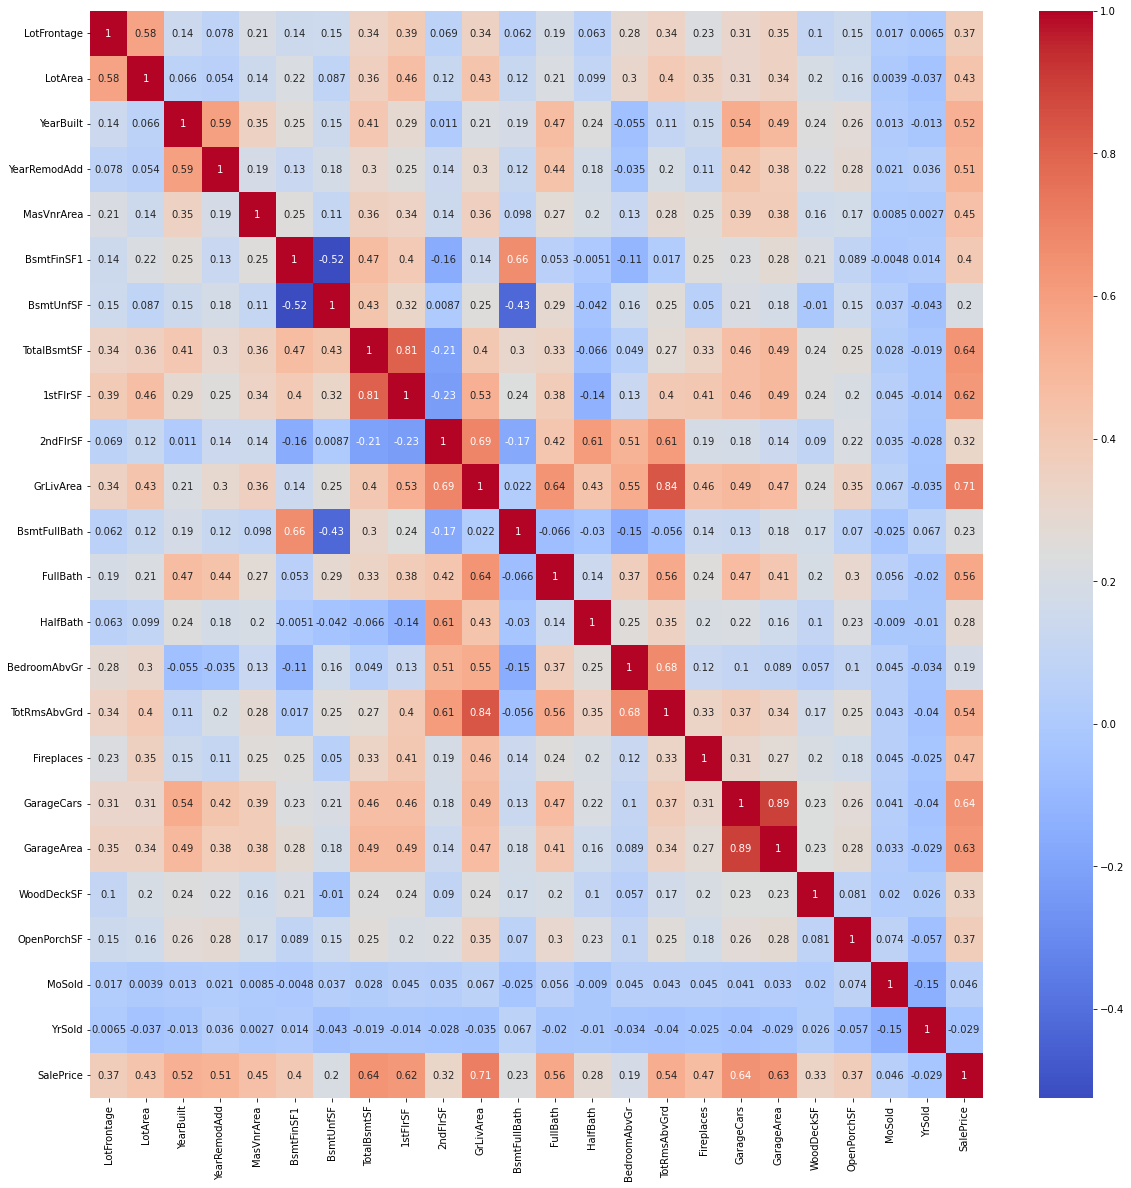

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(df_num.corr(),annot=True, cmap='coolwarm')
plt.show()

<div style="background:#eaecef;padding:10px;">
    <h3><i>Summary</i></h3>
<ul>
<li> Few columns has very high correlation with each other</li>
<li> TotRmsAbvGrd and GrLivArea (0.83)</li>
<li> GarageCars and GarageArea (0.89)</li>
<li> TotalBsmtSF and 1stflrSF (0.81)</li>
</ul>
<b>Should drop one from either of 2 columns after some more investigation.</b>
</div>

## 4.4   Univaritate and Bivariate Analysis, Data Visualization

####   Univaritate and Bivariate Analysis on Numerical columns

In [22]:
print(df_num.columns)
# for feature in df_num.columns:
#     print(feature)

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


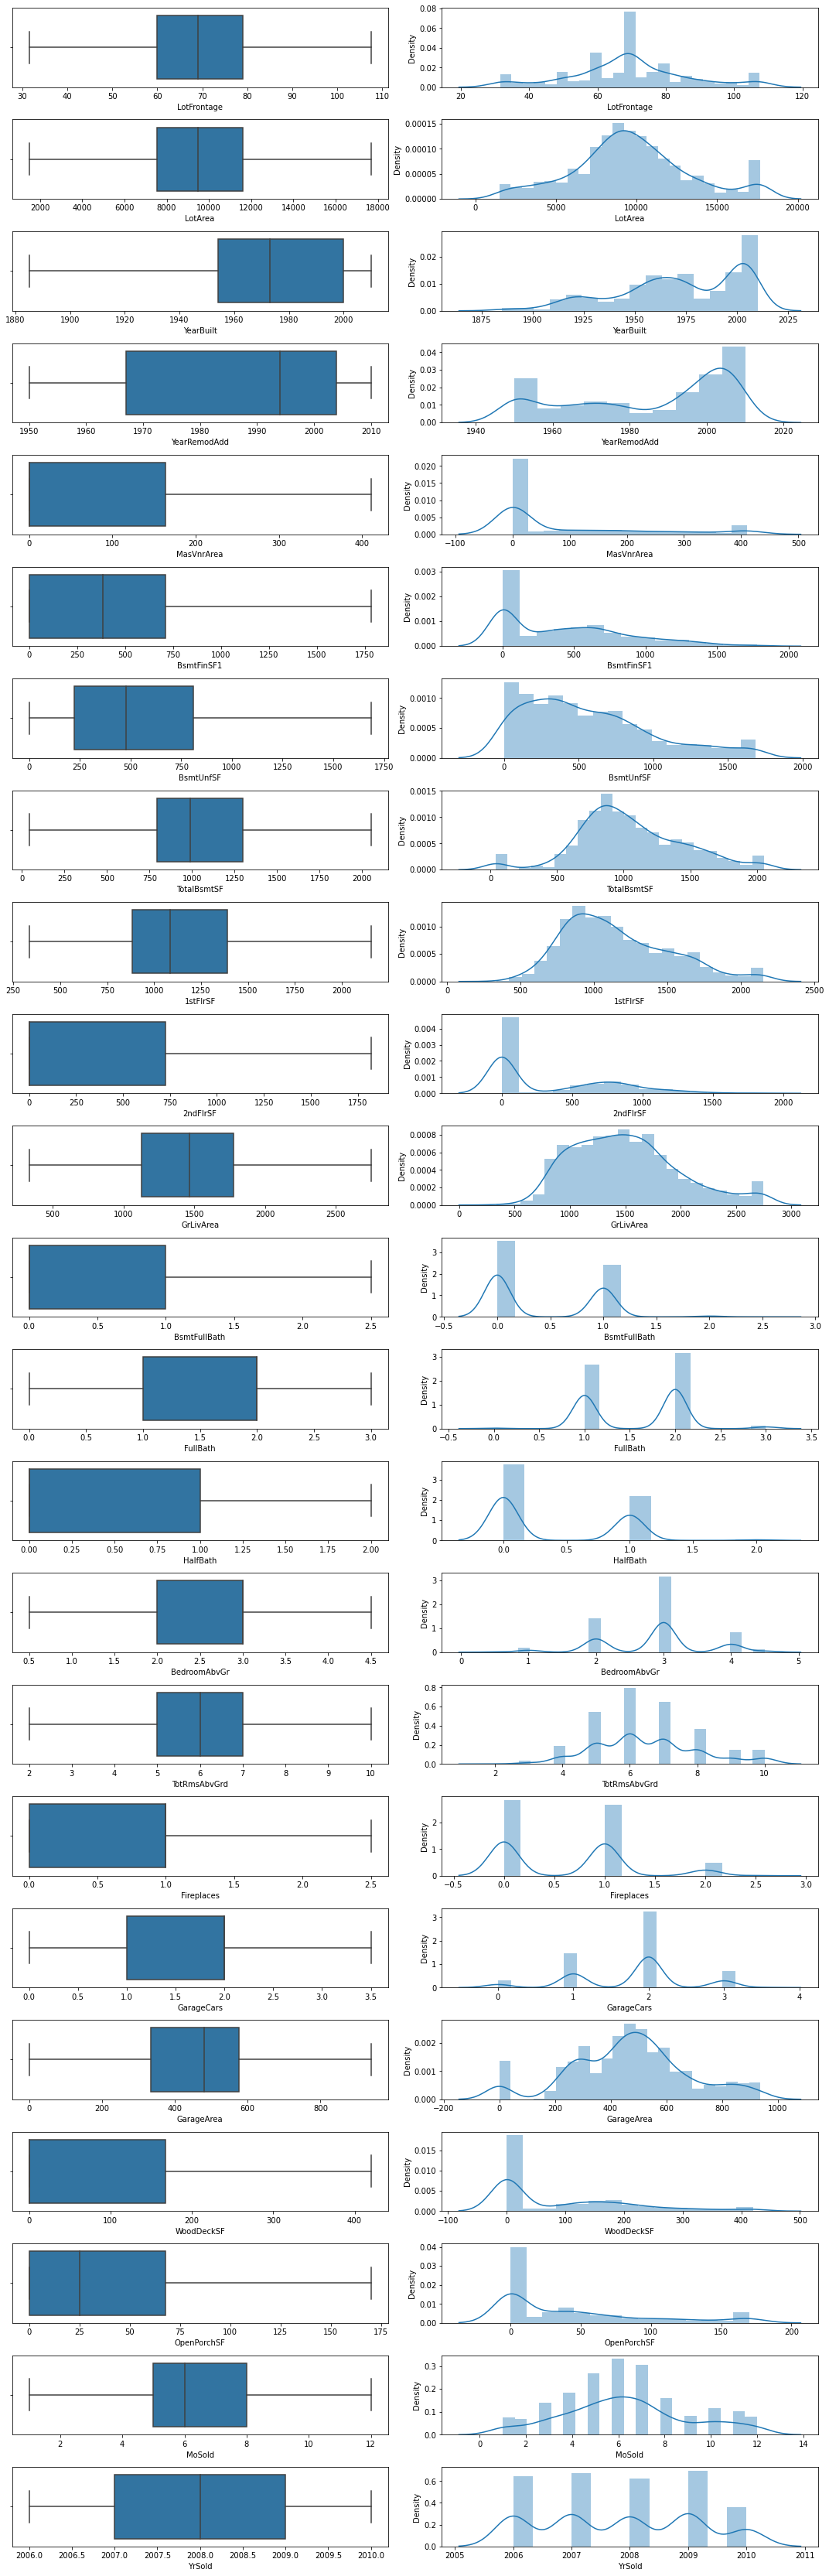

In [24]:
# Analyzing all Numerical columns using distribution plot and Analyzing all Numerical columns with target column
fig=plt.subplots(figsize=(15, 80))
i=0;
for col in df_num.columns:
    if(col not in ('Id','SalePrice','trans_SalePrice')):
        plt.subplot(40, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(df_num[col])
        plt.tight_layout()
        i=i+1
        plt.subplot(40, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.distplot(df_num[col])
        plt.tight_layout()
        i=i+1

# 5.  Analyzing Numerical Features


## 5.1 Checking the Categorical Features

<!-- 5.  Analyzing Categorical Features
    * 5.1   Checking the Categorical Features
    * 5.2   Data Visualization of Categorical columns
    * 5.3   Creating dummy variable from Categorical columns
    * 5.4   Dropping Redundant Features -->

**Checking the Categorical variables and separating in another list  for analysis**

In [25]:
df_cat = df_input.select_dtypes(include=['object'])
print(df_cat.columns)
df_cat.head(10)

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')


,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,2003.0,RFn,TA,TA,Y,None,None,None,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976.0,RFn,TA,TA,Y,None,None,None,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2001.0,RFn,TA,TA,Y,None,None,None,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,1998.0,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2000.0,RFn,TA,TA,Y,None,None,None,WD,Normal
5,50,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,None,Attchd,1993.0,Unf,TA,TA,Y,None,MnPrv,Shed,WD,Normal
6,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,2004.0,RFn,TA,TA,Y,None,None,None,WD,Normal
7,60,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1973.0,RFn,TA,TA,Y,None,None,Shed,WD,Normal
8,50,RM,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,TA,Detchd,1931.0,Unf,Fa,TA,Y,None,None,None,WD,Abnorml
9,190,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1939.0,RFn,Gd,TA,Y,None,None,None,WD,Normal



## 5.2 Data Visualization of Categorical columns

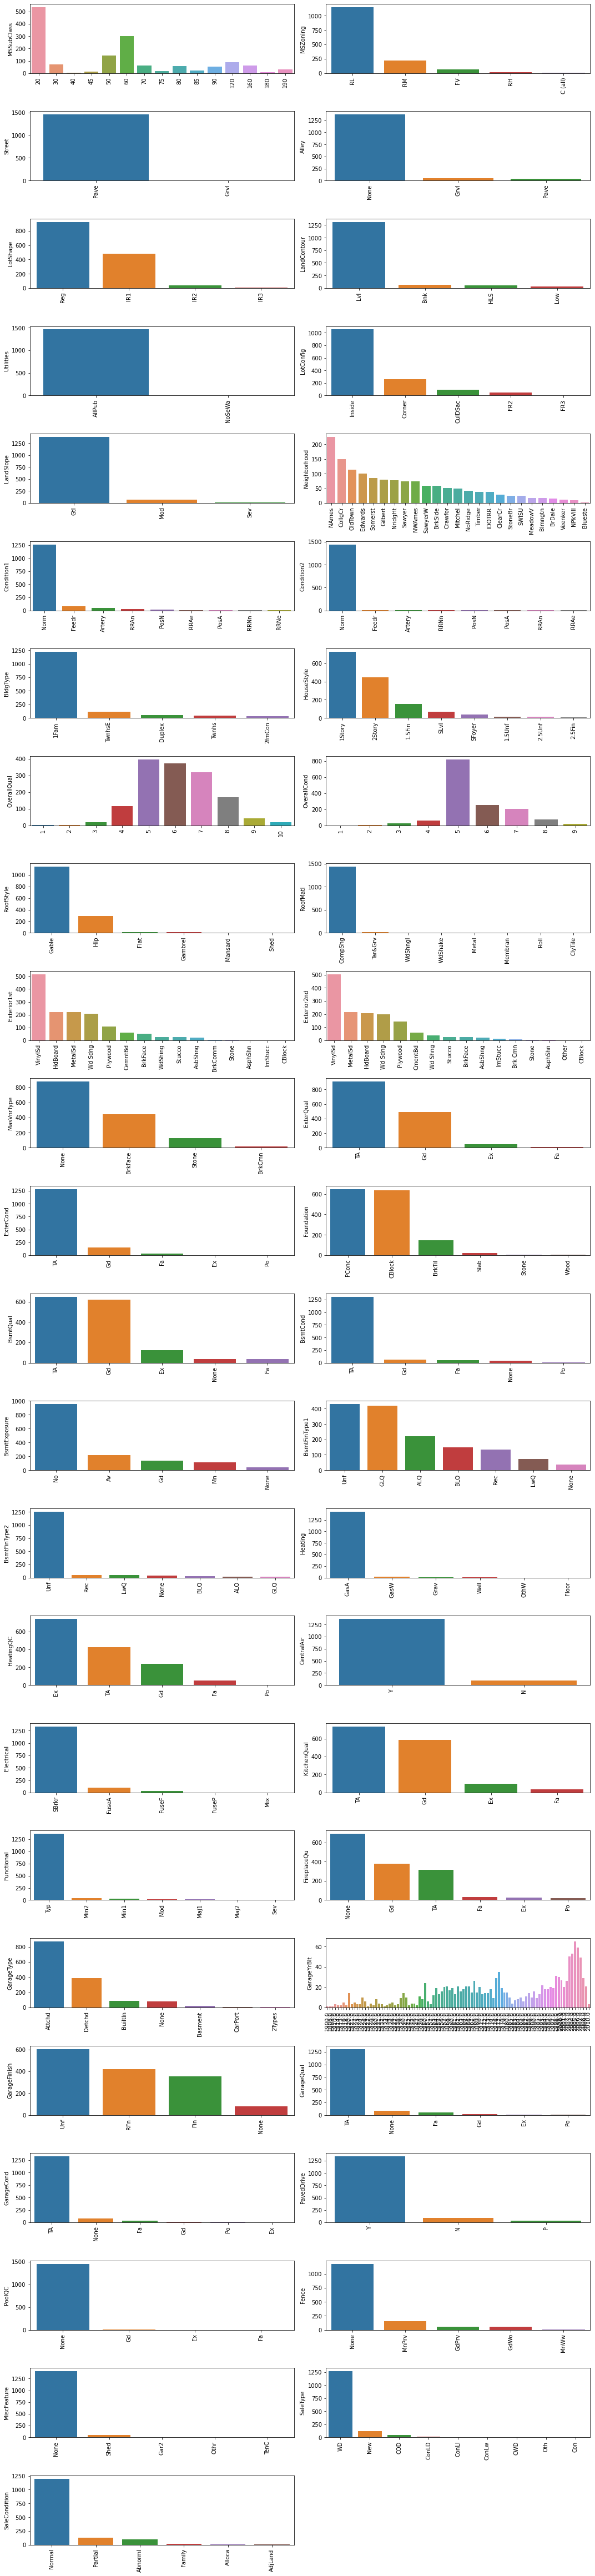

In [26]:
## Plot bar graph to for categorical columns
fig=plt.subplots(figsize=(15, 80))
i=0;
for c in df_cat.columns:
    plt.subplot(30, 2, i+1)
    sns.barplot(df_cat[c].value_counts().index, df_cat[c].value_counts())
    plt.xticks(rotation=90)
    plt.tight_layout()
    i=i+1


## 5.3 Creating dummy variable from Categorical columns

In [27]:
## Dummies from categorical columns
df_cat_dummy = pd.get_dummies(df_cat, drop_first=True)
print(df_cat_dummy.shape)
print(df_cat_dummy.columns)
df_cat_dummy.head()

(1460, 350)
Index(['MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50',
       'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80',
       'MSSubClass_85', 'MSSubClass_90',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=350)


,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,

# 6.  Transformation, Scaling and splitting


## 6.1   Transformation of Target Variable

<!-- 6.  Transformation and Scaling
    * 6.1   Transformation of Target Variable
    * 6.2   Feature Scaling
7.  Splitting data in Train and Test data
8.  Primary Feature Selection using RFE
9.  Ridge Regression
10.  Lasso Regression
11.  Apply transformations/scaling on Test Data
12.  Comparing model coefficients
13.  Model Evaluation 
14.  Choosing the final model and most significant features. -->

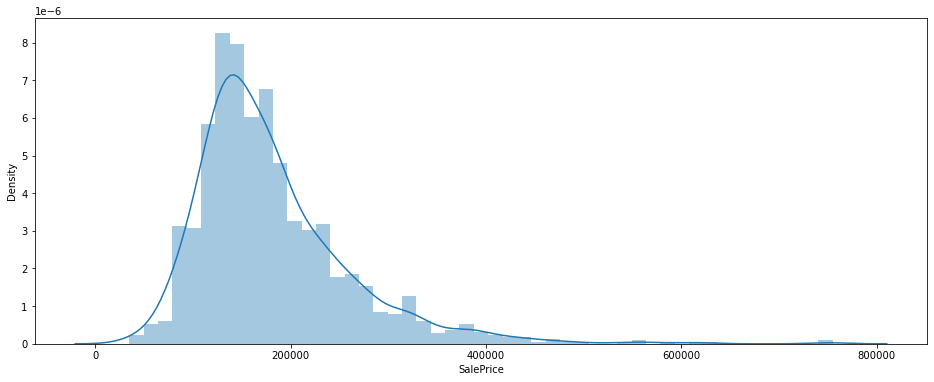

In [28]:
#Ploting the target column SalePrice for analysis
plt.figure(figsize=[16,6])
sns.distplot(df_num["SalePrice"])
plt.show()

<div style="background:#eaecef;padding:10px;">
    <h3><i>Summary</i></h3>
<ul>
<li>SalePrice : Target column 'SalePrice' is very skewed towards right side, Using log transformation to distribute the skewedness </li>
<li>Storing the log of SalePrice in another column "trans_SalePrice"</li>
</ul>
</div>

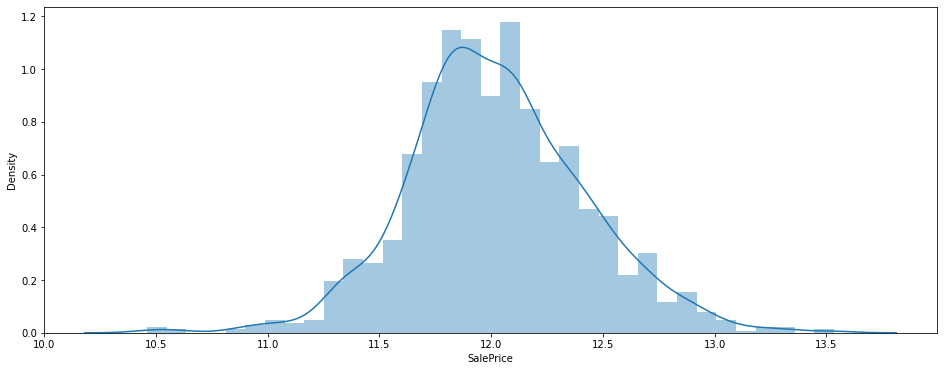

In [29]:
#Ploting the target column using log of SalePrice for analysis
plt.figure(figsize=[16,6])
sns.distplot(np.log(df_num["SalePrice"]))
plt.show()

In [30]:
# Storing the log of SalePrice in another column "trans_SalePrice"
df_num["trans_SalePrice"] = np.log(df_num["SalePrice"])

## 6.2   Feature Scaling

In [31]:
# Converting the year columns to number of years (using the current Year)
for col in ['YearBuilt','YearRemodAdd', 'YrSold']:
    df_num[col] = 2022 - df_num[col]

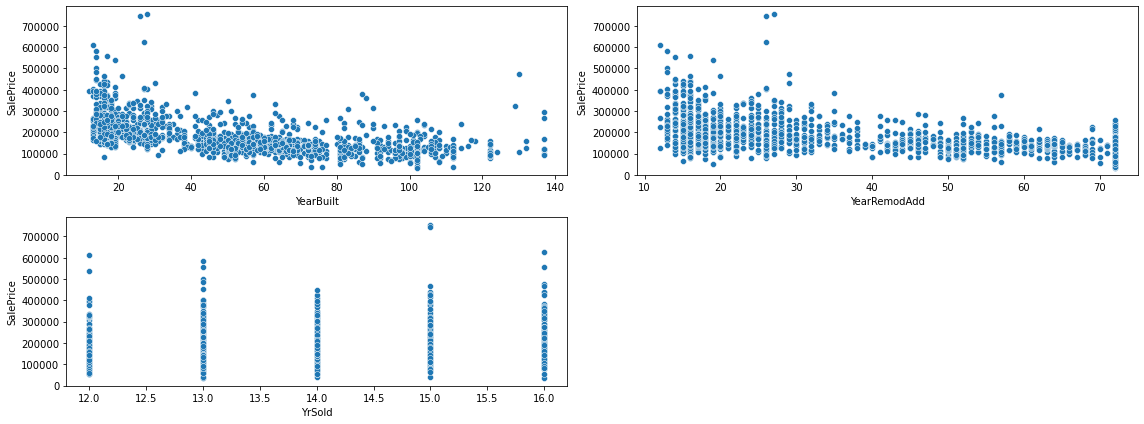

In [32]:
fig=plt.subplots(figsize=(16, 6))

for i, feature in enumerate(['YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(df_num[feature], df_num['SalePrice'])
    plt.tight_layout()

In [33]:
df_num.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice', 'trans_SalePrice'],
      dtype='object')

**Concatenate the updated numerical and categorical column in single Dataframe**

In [34]:
df_combined = pd.concat([df_num, df_cat_dummy], axis=1)
print(df_combined.shape)
df_combined.head()


(1460, 375)


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,trans_SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.

## 6.3   Splitting data in Train and Test data

**Split the Data into Dependent and Independent variables**

In [35]:
## copy all independent variables to make predictions excluding the target variable 'SalePrice'
X = df_combined.drop(['SalePrice', 'trans_SalePrice'], axis=1).copy()
X.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,Garag

In [36]:
## get target variable "SalesPrice" on y
y = df_combined.trans_SalePrice.copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: trans_SalePrice, dtype: float64

**Train - Test Split**

In [37]:
## Split the X and y into train and test - 70% and 30% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 6.4   Train feature Scaling using Standard scaling

**Scaling numerical columns Except (SalePrice and trans_SalePrice) using**

In [38]:
# Scaling numerical columns
num_cols = df_num.drop(["SalePrice", 'trans_SalePrice'], axis=1).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# 7.  Initial Feature Selection with RFE

In [39]:
# General function to predict top featured columns
def rfe_on_features(n):
    all_cols = []
    
    lin = LinearRegression()
    lin.fit(X_train, y_train)
    rfe = RFE(lin, n)
    rfe = rfe.fit(X_train, y_train)
    
    print("Features Counts (%d): " %n)
    rfe_rank = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_rank:
        if i[1]:
            all_cols.append(i[0])
    print(all_cols)
    return all_cols

In [40]:
# Using 55 columns
latest_55 = rfe_on_features(55)

Features Counts (55): 
['GrLivArea', 'MSSubClass_90', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosN', 'Condition2_RRNn', 'BldgType_2fmCon', 'OverallQual_2', 'OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'OverallCond_2', 'OverallCond_3', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'BsmtCond_None', 'BsmtCond_Po', 'BsmtFinType1_None', 'Heating_GasA', 'Heating_GasW', 'Heating_Wall', 'Functional_Sev', 'GarageType_None', 'GarageYrBlt_1938.0', 'GarageYrBlt_1941.0', 'GarageFinish_None', 'GarageQual_None', 'GarageCond

In [41]:
# Using 65 columns
latest_65 = rfe_on_features(65)

Features Counts (65): 
['YearBuilt', 'GrLivArea', 'MSSubClass_45', 'MSSubClass_90', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosN', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'HouseStyle_1.5Unf', 'OverallQual_2', 'OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'OverallCond_2', 'OverallCond_3', 'OverallCond_4', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'BsmtCond_None', 'BsmtCond_Po', 'BsmtFinType1_None', 'Heating_GasA', 'Heating_GasW', 'Heating_Wall

# 8.  Ridge Regression


In [42]:
# list of alphas for tuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [43]:
# function to plot the graph
def plot_summary(r, isLogX):
    plt.figure(figsize=[14,6])
    plt.plot(r['param_alpha'], r['mean_train_score'])
    plt.plot(r['param_alpha'], r['mean_test_score'])
    plt.xlabel('alpha')
    plt.ylabel('Negative MAE')
    plt.title("Negative MAE and alpha")
    if isLogX:
        plt.xscale('log')
    plt.legend(['train score', 'test score'], loc='upper left')
    plt.show()
    
def metrics_makr(y_train, y_train_pred, y_test, y_pred):
    r2_trn = r2_score(y_train, y_train_pred)
    r2_tst = r2_score(y_test, y_pred)
    rss_trn = np.sum(np.square(y_train - y_train_pred))
    rss_tst = np.sum(np.square(y_test - y_pred))
    mse_trn = mean_squared_error(y_train, y_train_pred)
    mse_tst = mean_squared_error(y_test, y_pred)
    rmse_trn = mse_trn**0.5
    rmse_tst = mse_tst**0.5
    
    print("R-Squared (Train):", "%.2f" % r2_trn, "    (Test): ", "%.2f" % r2_tst)
    print("RSS       (Train):", "%.2f" % rss_trn, "    (Test): ", "%.2f" % rss_tst)
    print("RMSE      (Train):", "%.2f" % rmse_trn, "    (Test): ", "%.2f" % rmse_tst)
    
    out_mat = []
    out_mat.append(r2_trn)
    out_mat.append(r2_tst)
    out_mat.append(rss_trn)
    out_mat.append(rss_tst)
    out_mat.append(rmse_trn)
    out_mat.append(rmse_tst)
    
    return out_mat

In [44]:
# Applying Ridge
ridge = Ridge()

# cross validation
folds = 5
ridgeCV = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error',  
                        cv = 5, return_train_score=True, verbose = 1, n_jobs=-1)  

ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [45]:
# get the best alpha value
ridgeCV.best_params_

{'alpha': 10.0}

In [46]:
# Make predictions
y_train_pred = ridgeCV.predict(X_train)
y_pred = ridgeCV.predict(X_test)
ridgeCV_results = pd.DataFrame(ridgeCV.cv_results_)
# Updating metrics
ridgeCV_metrics = metrics_makr(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train): 0.94     (Test):  0.89
RSS       (Train): 9.53     (Test):  8.26
RMSE      (Train): 0.10     (Test):  0.14


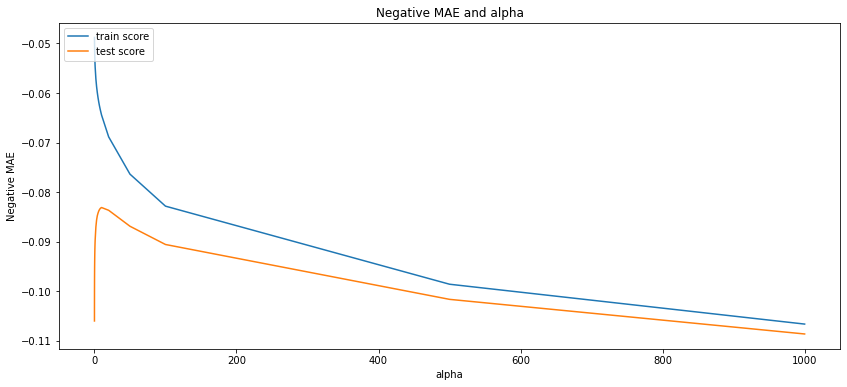

In [47]:
plot_summary(ridgeCV_results, False)

**Using the log to show properly on graph**

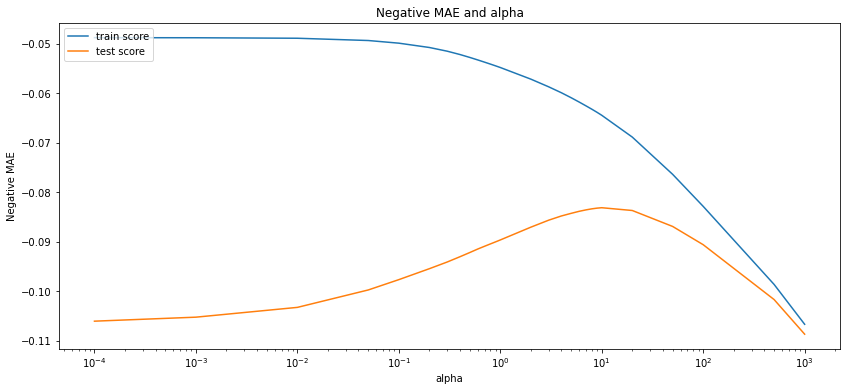

In [48]:
## R2 score vs alpha values plotting
plot_summary(ridgeCV_results, True)

#### We got the best alpha value as 10.  Build a Ridge regression model using this alpha value.

In [49]:
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([ 6.82256815e-03,  2.68744553e-02, -5.41141850e-02, -3.25935541e-02,
       -7.49095746e-04,  1.09646920e-02, -1.67506609e-02,  6.33939364e-02,
        3.87125877e-02,  5.78484817e-02,  6.97427870e-02,  1.01712416e-02,
        1.58362540e-02,  4.54119606e-03, -4.65352907e-04,  3.54983659e-03,
        1.27548862e-02,  2.08496825e-02,  1.30032349e-02,  1.03286244e-02,
        7.40608567e-03, -5.51762083e-04,  5.93138910e-03, -5.15773082e-02,
       -1.19182929e-02,  8.13943445e-03,  9.00620647e-03, -2.56593530e-02,
        5.82955828e-02,  2.09051852e-02, -9.12707553e-03,  9.25050201e-04,
       -2.91501061e-02,  5.74885780e-03, -3.59056250e-02, -2.20379372e-02,
       -1.98258856e-02,  4.71095646e-02,  4.15874964e-02,  6.21459253e-02,
        2.81448329e-02,  3.62088695e-03, -1.51746483e-03,  3.16960538e-02,
        1.15166633e-02, -3.53059704e-02,  1.03359399e-02,  2.89537886e-02,
        2.38153508e-02,  3.38325604e-02, -3.71447786e-03,  3.78945199e-02,
       -2.26285238e-02, -

# 9.  Lasso Regression


In [50]:
# Applying Lasso
lasso = Lasso()
# cross validation
folds = 5
lassoCV = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'neg_mean_absolute_error', cv = folds, 
                        return_train_score=True, verbose = 1)            

lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [51]:
## Best value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [52]:
# Make predictions
y_train_pred = lassoCV.predict(X_train)
y_pred = lassoCV.predict(X_test)
lassoCV_results = pd.DataFrame(lassoCV.cv_results_)
# Updating metrics
lassoCV_metrics = metrics_makr(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train): 0.92     (Test):  0.88
RSS       (Train): 12.65     (Test):  8.44
RMSE      (Train): 0.11     (Test):  0.14


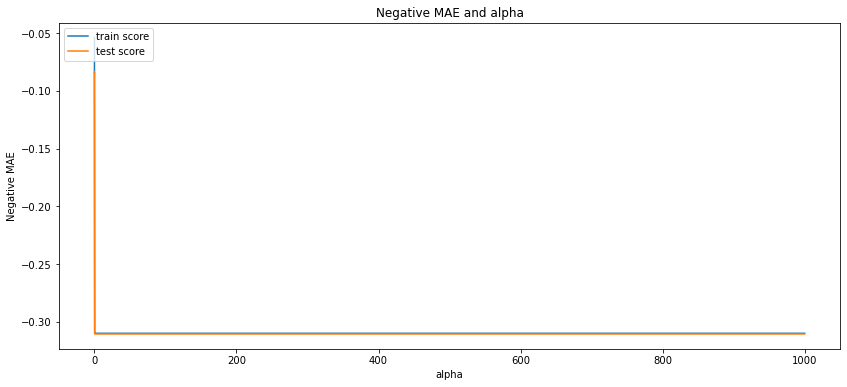

In [53]:
# plotting the normal values in graph
plot_summary(lassoCV_results, False)

**Using the log to show properly on graph**

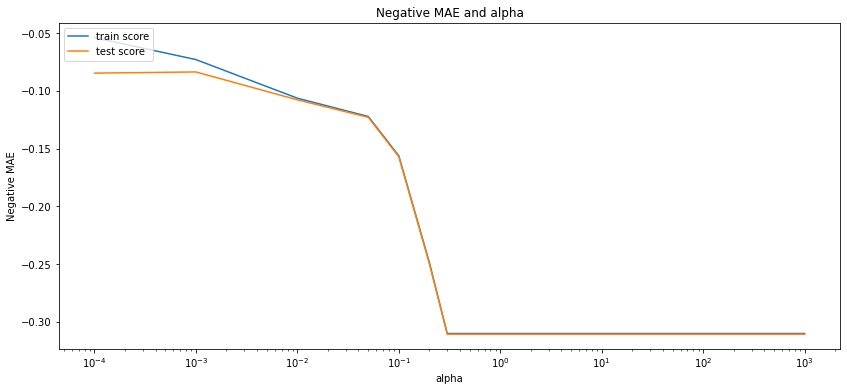

In [54]:
## R2 score vs alpha values plotting
plot_summary(lassoCV_results, True)

#### We got the best alpha value as 0.001.  Build a lasso regression model using this alpha value.

In [55]:
alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [56]:
lasso.coef_

array([ 0.00487415,  0.02405636, -0.06038613, -0.03531951,  0.00158456,
        0.01918086, -0.00915365,  0.06713422,  0.02701722,  0.0460083 ,
        0.09187748,  0.00948255,  0.01087193,  0.00358031, -0.00223126,
       -0.        ,  0.01926273,  0.02371482,  0.0115801 ,  0.01053776,
        0.00641278, -0.        ,  0.00371459, -0.05531513, -0.        ,
        0.        ,  0.00456439, -0.        ,  0.05426386,  0.        ,
        0.        ,  0.        , -0.02521695,  0.        , -0.        ,
       -0.        , -0.        ,  0.01509079,  0.        ,  0.04198665,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.0004322 ,  0.        ,  0.        ,  0.00266734,
       -0.        ,  0.02677306, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.03649428,
        0.0177703 , -0.        ,  0.08517684, -0.05050371, -0.        ,
       -0.03226439, -0.02822385, -0.01644495, -0.        ,  0.  

# 10.  Comparing model coefficients


In [57]:
model_coefficients = pd.DataFrame(index=X_test.columns)
model_coefficients.rows = X_test.columns

model_coefficients['Ridge (alpha=10.0)'] = ridge.coef_
model_coefficients['Lasso (alpha=0.001)'] = lasso.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=10.0),Lasso (alpha=0.001)
LotFrontage,0.006823,0.004874
LotArea,0.026874,0.024056
YearBuilt,-0.054114,-0.060386
YearRemodAdd,-0.032594,-0.035320
MasVnrArea,-0.000749,0.001585
BsmtFinSF1,0.010965,0.019181
BsmtUnfSF,-0.016751,-0.009154
TotalBsmtSF,0.063394,0.067134
1stFlrSF,0.038713,0.027017
2ndFlrSF,0.057848,0.046008


In [58]:
# Converting the predictions to its original scale (anti log)
test_pred = np.round(np.exp(y_pred)).astype(int)
print(test_pred[:20])

[123466 193864 167464 201341 146476 245993 214642 296470 107364 158872
 188895 179075 156050 221920 106754 137150 176677 102063 133823 114648]


# 11.  Choosing the final model and most significant features

**Lasso Regression produced slightly R2 score on test data than Ridge Regression. Choosing Lasso as the final model.**

In [59]:
# Lasso Regression : 50 features ordered by importance
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)

,Lasso (alpha=0.001)
OverallQual_9,0.149957
GrLivArea,0.091877
OverallQual_8,0.087842
Neighborhood_Crawfor,0.085177
CentralAir_Y,0.077898
Neighborhood_Somerst,0.077123
Functional_Typ,0.071749
TotalBsmtSF,0.067134
Exterior1st_BrkFace,0.064919
Condition1_Norm,0.057429


In [60]:
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False).index[:10]

Index(['OverallQual_9', 'GrLivArea', 'OverallQual_8', 'Neighborhood_Crawfor',
       'CentralAir_Y', 'Neighborhood_Somerst', 'Functional_Typ', 'TotalBsmtSF',
       'Exterior1st_BrkFace', 'Condition1_Norm'],
      dtype='object')

# 12.  Summary

<div style="background:#eaecef;padding:10px;">
    <ul>
        <li>The housing data is read and analyzed divided into numerical and categorical types. </li>
        <li>The traget column of was `SalePrice`. </li>
        <li>All the features are then analyzed, data handling for missing values, detected the outliers and date cleaned. SalePrice Trend is observed for change in various features.</li>
        <li>Extracted New features, redundant features dropped and categorical features are splitted in to many other individual feature for beter performance and optimum preditons. Data splitted into train and test data and feature scaling was performed.</li>
        <li>The traget column `SalePrice` was skiewed in right, so natural log was used for model building and natural log of `SalePrice` was considered. </li>
        <li>Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method.
            Optimum alpha = 10.0 for ridge and 0.001 for lasso model.</li>
        <li>Model evaluation is done with R2 score, RSS and Root Mean Square Error.</li>
        <li>Lasso Regression is chosen as final model for having slightly better R-square value on test data.</li>
        <li>Out of 50 features in the final model, top 10 features in order of descending importance are ['OverallQual_9', 'GrLivArea', 'OverallQual_8', 'Neighborhood_Crawfor','CentralAir_Y', 'Neighborhood_Somerst', 'Functional_Typ', 'TotalBsmtSF','Exterior1st_BrkFace', 'Condition1_Norm']</li>
        <li>Predicted value of `SalePrice` is tranformed into its original scale by performing exponential (antilog). </li>
    </ul>
</div>